In [159]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [252]:
df_final1 = pd.read_csv("export_bossa_nova.csv")
df_final2 = pd.read_csv("export_hip_hop1.csv")
df_final3 = pd.read_csv("export_hip_hop2.csv")
df_final4 = pd.read_csv("export_italo_disco.csv")
df_final5 = pd.read_csv("export_pop_house.csv")
df_final6 = pd.read_csv("export_rggae_world_classic_more.csv")
df_final7 = pd.read_csv("export_synth_pop_rock_rockc.csv")
df_final8 = pd.read_csv("export_techno.csv")
df_final9 = pd.read_csv("export_big.csv")
df_final10 = pd.read_csv("export_big2.csv")


In [253]:
df_final=pd.concat([df_final1,df_final2, df_final3, df_final4, df_final5, df_final6, df_final7, df_final8, df_final9, df_final10])

In [254]:
df_final=df_final.drop_duplicates()

In [255]:
df_final

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,209ucYTS6vWEV5iydrHiOt,0.793,0.372,10,-15.491,1,0.0509,0.687,0.573000,0.1050,0.482,120.134,233544
1,5je0CDv1Z1hT82Nek1Fjhl,0.578,0.364,2,-15.162,1,0.0441,0.683,0.053900,0.1050,0.723,78.073,216227
2,0Vl9aGb0dmeiCQ2ATgNK2B,0.592,0.761,5,-6.432,0,0.0514,0.614,0.000036,0.3010,0.843,88.470,159333
3,0r1Ta1ImfdKXJ0iYqdN3uX,0.437,0.221,11,-20.372,0,0.0452,0.992,0.946000,0.1040,0.259,130.516,167720
4,2HgcLPRWFrYEgulCUqgosg,0.726,0.371,7,-11.088,0,0.0681,0.853,0.000002,0.1140,0.961,89.143,88085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,45YtTdmH2PNKEnxN3uTZQy,0.702,0.226,5,-13.417,1,0.0457,0.980,0.001020,0.0653,0.881,92.420,200067
4352,5RLzsVW6UNiV2YrOlKwzNN,0.644,0.156,1,-16.529,1,0.0329,0.532,0.000000,0.1050,0.744,113.960,171427
4353,4qQ8sToR3GNossXlwSlyKz,0.680,0.258,9,-11.995,1,0.0554,0.627,0.000000,0.2930,0.781,132.056,147293
4354,0RluX0auLYdKAZxWQZpLiG,0.177,0.266,8,-13.568,1,0.0348,0.901,0.000000,0.1250,0.122,79.974,155667


In [256]:
df_final.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000
mean,0.635924,0.661439,5.262634,-7.195518,0.609865,0.088983,0.215583,0.069744,0.178197,0.523267,121.028497,226515.498371
std,0.149828,0.206906,3.612293,4.029262,0.487803,0.088694,0.269569,0.215271,0.140280,0.238062,27.475443,63228.804333
min,0.065900,0.000707,0.000000,-43.657000,0.000000,0.022700,0.000001,0.000000,0.015700,0.027900,39.497000,25260.000000
25%,0.543000,0.545000,2.000000,-8.331000,0.000000,0.036800,0.020600,0.000000,0.093200,0.341000,99.978000,190472.000000
50%,0.647000,0.697000,5.000000,-6.229000,1.000000,0.051700,0.093800,0.000003,0.122000,0.525000,121.027000,215776.000000
75%,0.741000,0.817000,8.000000,-4.816000,1.000000,0.096500,0.306000,0.000789,0.222000,0.713000,137.978000,246587.000000
max,0.982000,1.000000,11.000000,0.175000,1.000000,0.889000,0.996000,0.987000,0.989000,1.000000,213.087000,875160.000000


In [257]:
df_final = df_final.drop('mode', axis=1)
#df_final = df_final.drop('acousticness', axis=1)
df_final = df_final.drop('liveness', axis=1)
df_final = df_final.drop('speechiness', axis=1)
df_final = df_final.drop('instrumentalness', axis=1)
df_final = df_final.drop('duration_ms', axis=1)
#df_final = df_final.drop("loudness", axis= 1)
#df_final = df_final.drop('valence', axis=1)

In [258]:
df_final=df_final.set_index('id')


In [259]:
df_final.describe()

,danceability,energy,key,loudness,acousticness,valence,tempo
count,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000,10745.000000
mean,0.635924,0.661439,5.262634,-7.195518,0.215583,0.523267,121.028497
std,0.149828,0.206906,3.612293,4.029262,0.269569,0.238062,27.475443
min,0.065900,0.000707,0.000000,-43.657000,0.000001,0.027900,39.497000
25%,0.543000,0.545000,2.000000,-8.331000,0.020600,0.341000,99.978000
50%,0.647000,0.697000,5.000000,-6.229000,0.093800,0.525000,121.027000
75%,0.741000,0.817000,8.000000,-4.816000,0.306000,0.713000,137.978000
max,0.982000,1.000000,11.000000,0.175000,0.996000,1.000000,213.087000


In [260]:
scaler = StandardScaler()
scaler.fit(df_final)
final_scaled = scaler.transform(df_final)
final_scaled_df = pd.DataFrame(final_scaled, columns = df_final.columns)

In [261]:
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

In [262]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

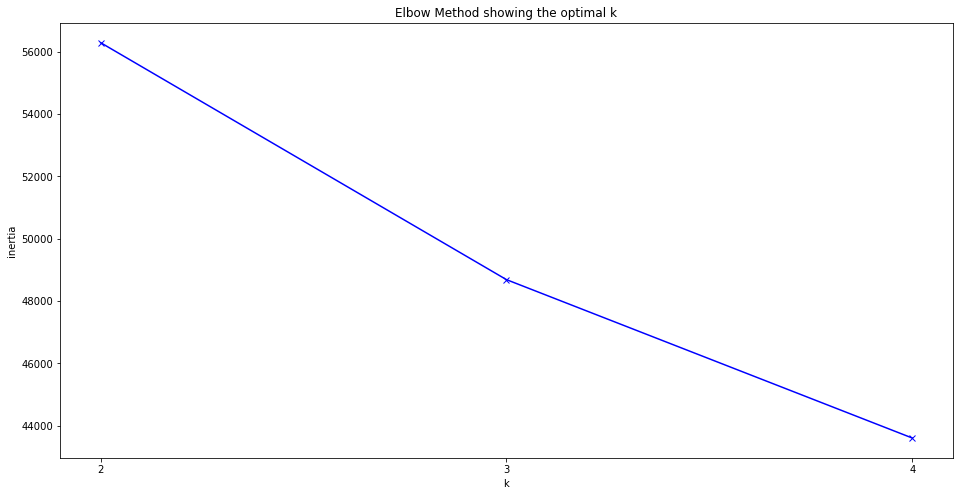

In [263]:
K = range(2, 5)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(final_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [264]:
kmeans = KMeans(n_clusters=70, random_state=123)
kmeans.fit(final_scaled_df)

KMeans(n_clusters=70, random_state=123)

In [265]:
clusters = kmeans.predict(final_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0     248
1      96
2     143
3     210
4     176
     ... 
65     72
66    230
67    117
68    190
69    207
Length: 70, dtype: int64

In [266]:
with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [267]:
df_final["cluster"] = clusters

In [268]:
df_final.reset_index(inplace=True)

In [269]:
df_final

,id,danceability,energy,key,loudness,acousticness,valence,tempo,cluster
0,209ucYTS6vWEV5iydrHiOt,0.793,0.372,10,-15.491,0.687,0.482,120.134,64
1,5je0CDv1Z1hT82Nek1Fjhl,0.578,0.364,2,-15.162,0.683,0.723,78.073,27
2,0Vl9aGb0dmeiCQ2ATgNK2B,0.592,0.761,5,-6.432,0.614,0.843,88.470,42
3,0r1Ta1ImfdKXJ0iYqdN3uX,0.437,0.221,11,-20.372,0.992,0.259,130.516,40
4,2HgcLPRWFrYEgulCUqgosg,0.726,0.371,7,-11.088,0.853,0.961,89.143,27
...,...,...,...,...,...,...,...,...,...
10740,45YtTdmH2PNKEnxN3uTZQy,0.702,0.226,5,-13.417,0.980,0.881,92.420,27
10741,5RLzsVW6UNiV2YrOlKwzNN,0.644,0.156,1,-16.529,0.532,0.744,113.960,5
10742,4qQ8sToR3GNossXlwSlyKz,0.680,0.258,9,-11.995,0.627,0.781,132.056,64
10743,0RluX0auLYdKAZxWQZpLiG,0.177,0.266,8,-13.568,0.901,0.122,79.974,49


In [270]:
df_final.to_csv(r'C:\Users\Lenovo\Documents\GitHub\Ironhack-Labs-Valentin\spotify_project\export_recommender.csv', index=False, header=True)